## Spark no window

In [ ]:
import pandas as pd

spark_nw = pd.read_csv('spark_nw.csv')

spark_nw['processed_at'] = pd.to_datetime(spark_nw['processed_at'])

max_processed_at = spark_nw['processed_at'].max()
min_processed_at = spark_nw['processed_at'].min()

In [2]:

print("Max 'processed_at':", max_processed_at)
print("Min 'processed_at':", min_processed_at)
print(f"Processing time: {max_processed_at - min_processed_at}")


Max 'processed_at': 2024-12-31 12:28:34.587000+00:00
Min 'processed_at': 2024-12-31 12:28:11.271000+00:00
Processing time: 0 days 00:00:23.316000


In [3]:
processed_at_counts = spark_nw['processed_at'].value_counts()
processed_at_counts

processed_at
2024-12-31 12:28:31.684000+00:00    135808
2024-12-31 12:28:15.441000+00:00    135729
2024-12-31 12:28:19.324000+00:00    135715
2024-12-31 12:28:25.590000+00:00    135663
2024-12-31 12:28:34.587000+00:00    135661
2024-12-31 12:28:28.793000+00:00    135659
2024-12-31 12:28:22.438000+00:00    135639
2024-12-31 12:28:11.271000+00:00     50118
Name: count, dtype: int64

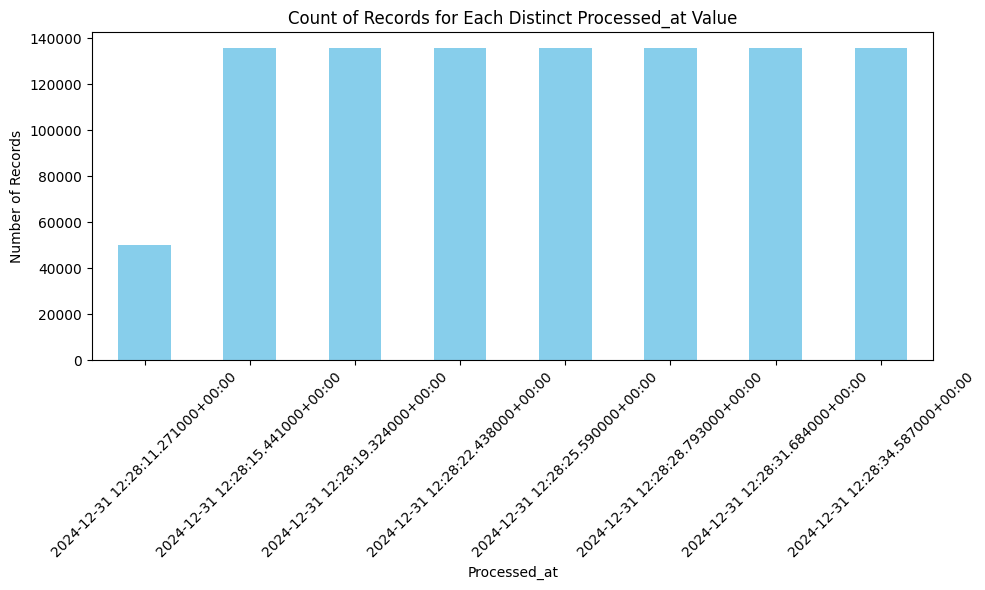

In [4]:
import matplotlib.pyplot as plt
# Plot the results
plt.figure(figsize=(10, 6))
processed_at_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Count of Records for Each Distinct Processed_at Value')
plt.xlabel('Processed_at')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Spark window

In [7]:
spark_w = pd.read_csv('spark_w.csv')

spark_w['processed_at'] = pd.to_datetime(spark_w['processed_at'])

max_processed_at = spark_w['processed_at'].max()
min_processed_at = spark_w['processed_at'].min()

In [8]:

print("Max 'processed_at':", max_processed_at)
print("Min 'processed_at':", min_processed_at)
print(f"Processing time: {max_processed_at - min_processed_at}")

Max 'processed_at': 2024-12-31 12:31:15.444000+00:00
Min 'processed_at': 2024-12-31 12:30:54.007000+00:00
Processing time: 0 days 00:00:21.437000


In [11]:
processed_at_counts = spark_w['processed_at'].value_counts()
processed_at_counts

processed_at
2024-12-31 12:31:00.633000+00:00    256
2024-12-31 12:31:07.048000+00:00    256
2024-12-31 12:31:12.633000+00:00    256
2024-12-31 12:30:54.007000+00:00    256
2024-12-31 12:30:57.590000+00:00    128
2024-12-31 12:31:03.921000+00:00    128
2024-12-31 12:31:09.808000+00:00    128
2024-12-31 12:31:15.444000+00:00    128
Name: count, dtype: int64

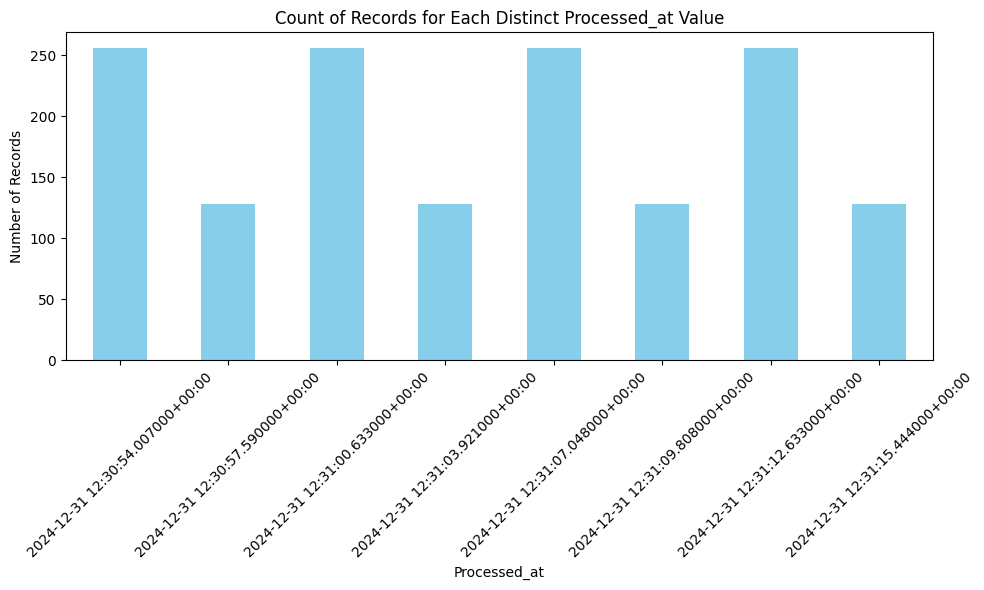

In [12]:
import matplotlib.pyplot as plt
# Plot the results
plt.figure(figsize=(10, 6))
processed_at_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Count of Records for Each Distinct Processed_at Value')
plt.xlabel('Processed_at')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Storm no window

In [14]:
column_names = ['id', 'game_name', 'sentiment', 'timestamp', 'processed_at', 'written_at']

storm_nw = pd.read_csv('storm_nw.csv', names = column_names)

storm_nw['processed_at'] = pd.to_datetime(storm_nw['processed_at'])
storm_nw['written_at'] = pd.to_datetime(storm_nw['written_at'])

max_processed_at = storm_nw['processed_at'].max()
min_processed_at = storm_nw['processed_at'].min()
max_written_at = storm_nw['written_at'].max()
min_written_at = storm_nw['written_at'].min()

In [15]:
print("Max 'processed_at':", max_processed_at)
print("Min 'processed_at':", min_processed_at)
print("Max 'written_at':", max_written_at)
print("Min 'written_at':", min_written_at)
print(f"Processing time: {max_written_at - min_processed_at}")

Max 'processed_at': 2025-01-02 19:38:14.902958649+00:00
Min 'processed_at': 2025-01-02 19:27:59.370765610+00:00
Max 'written_at': 2025-01-02 19:38:22.514383745+00:00
Min 'written_at': 2025-01-02 19:27:59.378746671+00:00
Processing time: 0 days 00:10:23.143618135


In [24]:
storm_nw['writing_time'] = (storm_nw['written_at'] - storm_nw['processed_at']).dt.total_seconds()
print(f'Max  diff {storm_nw['writing_time'].max()}')
print(f'Min  diff {storm_nw['writing_time'].min()}')

Max  diff 21.447267
Min  diff 0.000352613


In [39]:
# Count writing_time values under and over a second
under_a_second = (storm_nw['writing_time'] < 1).sum()
over_a_second = (storm_nw['writing_time'] >= 1).sum()

print(f"Number of records with writing_time under a second: {under_a_second}")
print(f"Number of records with writing_time over a second: {over_a_second}")

Number of records with writing_time under a second: 2336
Number of records with writing_time over a second: 997664


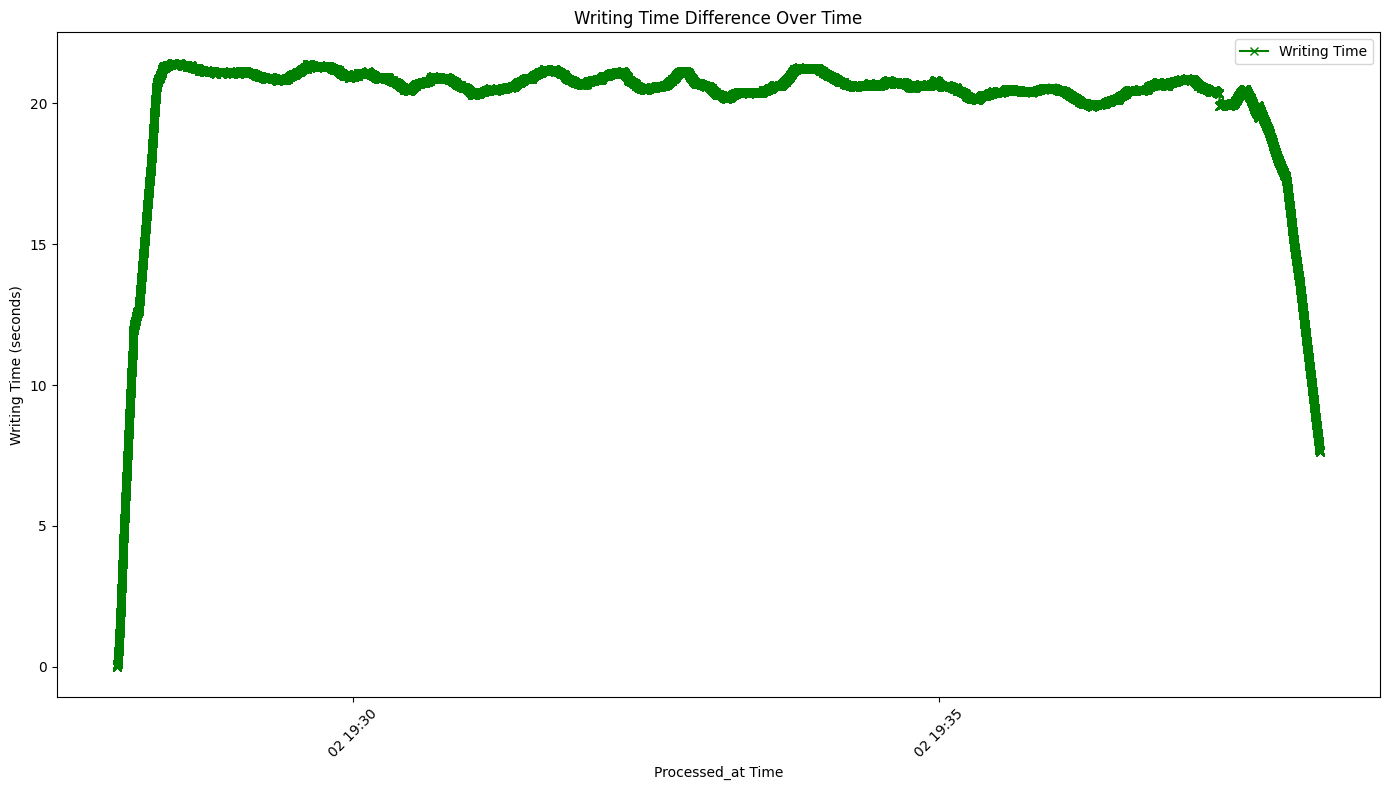

In [27]:
# Plot writing time over time
plt.figure(figsize=(14, 8))

# Plot writing time
plt.plot(storm_nw['processed_at'], storm_nw['writing_time'], label='Writing Time', color='green', marker='x')

# Formatting the plot
plt.title('Writing Time Difference Over Time')
plt.xlabel('Processed_at Time')
plt.ylabel('Writing Time (seconds)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/3c/xpn63_zx60zfp8q71qd10x7w0000gn/T/ipykernel_27988/2329721428.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  storm_nw['processed_at_minute'] = storm_nw['processed_at'].dt.floor('T')


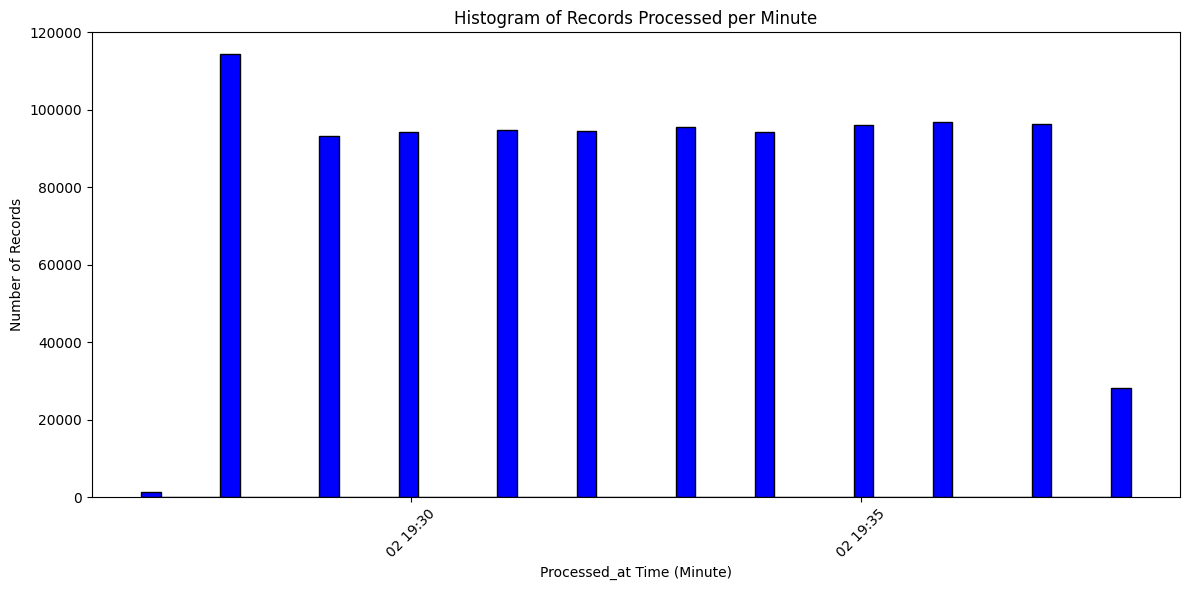

In [28]:
# Round 'processed_at' to the nearest minute
storm_nw['processed_at_minute'] = storm_nw['processed_at'].dt.floor('T')

# Plot histogram of how many records are processed per minute
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(storm_nw['processed_at_minute'], bins=50, color='blue', edgecolor='black')

# Formatting the plot
plt.title('Histogram of Records Processed per Minute')
plt.xlabel('Processed_at Time (Minute)')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/3c/xpn63_zx60zfp8q71qd10x7w0000gn/T/ipykernel_27988/128670299.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  storm_nw['written_at_minute'] = storm_nw['written_at'].dt.floor('T')


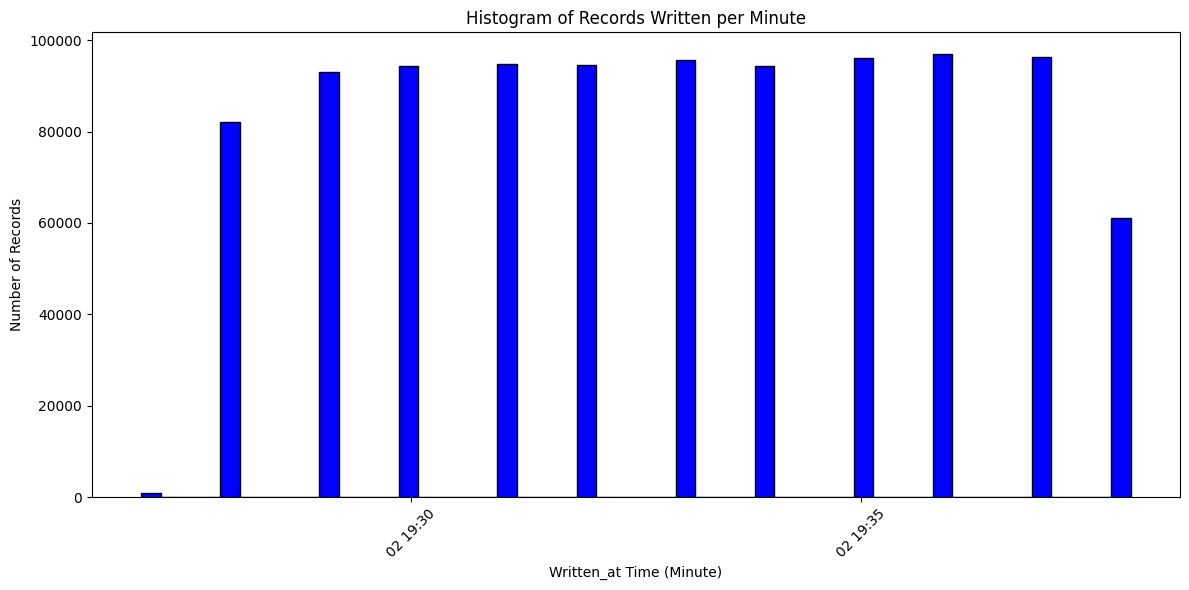

In [29]:
# Round 'processed_at' to the nearest minute
storm_nw['written_at_minute'] = storm_nw['written_at'].dt.floor('T')

# Plot histogram of how many records are processed per minute
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(storm_nw['written_at_minute'], bins=50, color='blue', edgecolor='black')

# Formatting the plot
plt.title('Histogram of Records Written per Minute')
plt.xlabel('Written_at Time (Minute)')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Storm window

In [30]:
column_names = ['id', 'game_name', 'sentiment', 'timestamp', 'processed_at', 'window_start', 'window_end', 'count', 'written_at']

storm_w = pd.read_csv('storm_w.csv', names = column_names)

storm_w['processed_at'] = pd.to_datetime(storm_w['processed_at'])
storm_w['written_at'] = pd.to_datetime(storm_w['written_at'])

max_processed_at = storm_w['processed_at'].max()
min_processed_at = storm_w['processed_at'].min()
max_written_at = storm_w['written_at'].max()
min_written_at = storm_w['written_at'].min()

In [32]:
print("Max 'processed_at':", max_processed_at)
print("Min 'processed_at':", min_processed_at)
print("Max 'written_at':", max_written_at)
print("Min 'written_at':", min_written_at)
print(f"Processing time: {max_written_at - min_processed_at}")

Max 'processed_at': 2025-01-02 18:20:35.588717433+00:00
Min 'processed_at': 2025-01-02 18:14:57.943779480+00:00
Max 'written_at': 2025-01-02 18:23:08.086416622+00:00
Min 'written_at': 2025-01-02 18:16:32.648449398+00:00
Processing time: 0 days 00:08:10.142637142


In [33]:
storm_w['writing_time'] = (storm_w['written_at'] - storm_w['processed_at']).dt.total_seconds()
print(f'Max  diff {storm_w['writing_time'].max()}')
print(f'Min  diff {storm_w['writing_time'].min()}')

Max  diff 155.873787457
Min  diff 94.48969027


In [35]:
processed_at_counts = storm_w['window_start'].value_counts()
processed_at_counts

window_start
2024-12-29 19:05:43.827487    128
2024-12-29 19:10:00.001076    128
2024-12-29 19:15:00.005507    128
2024-12-29 19:20:00.002397    128
Name: count, dtype: int64

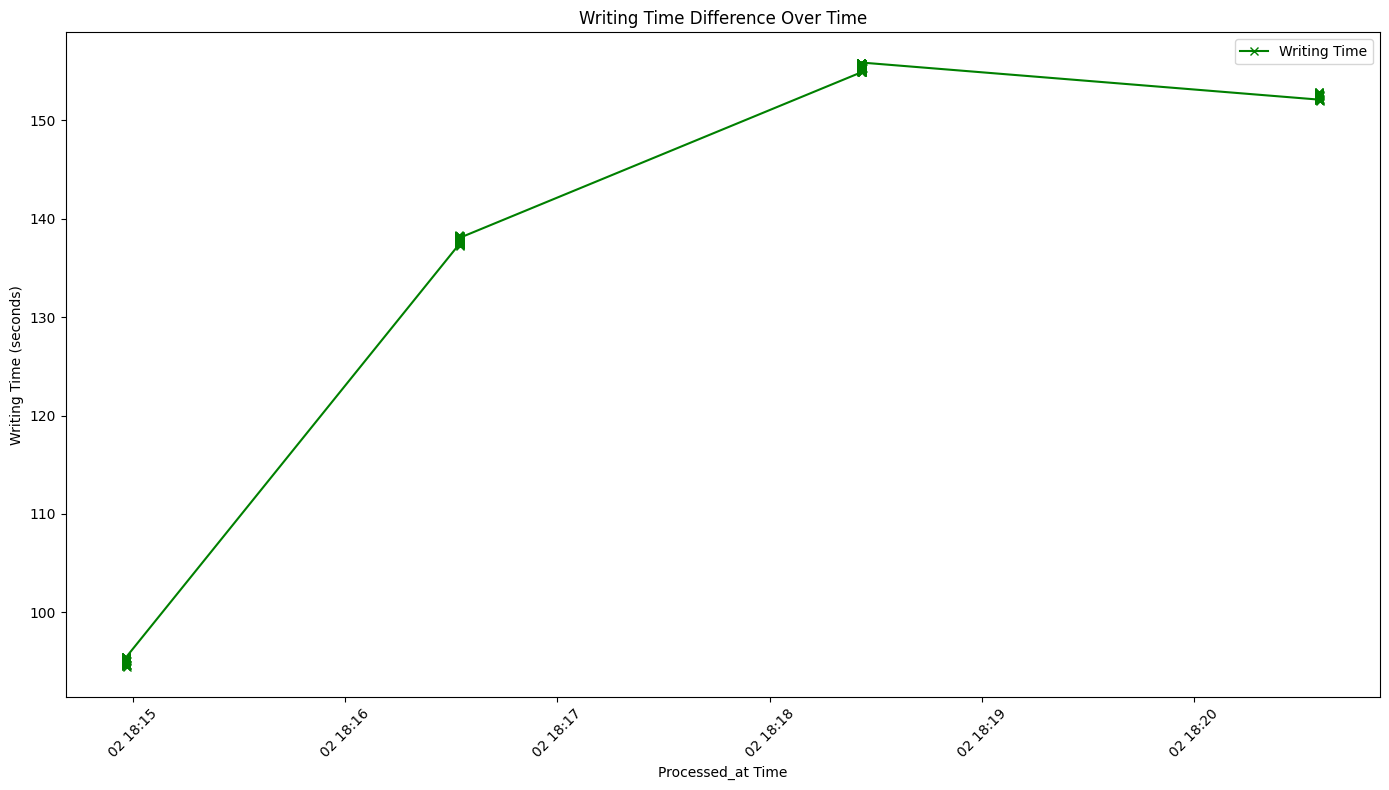

In [34]:
plt.figure(figsize=(14, 8))

# Plot writing time
plt.plot(storm_w['processed_at'], storm_w['writing_time'], label='Writing Time', color='green', marker='x')

# Formatting the plot
plt.title('Writing Time Difference Over Time')
plt.xlabel('Processed_at Time')
plt.ylabel('Writing Time (seconds)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/3c/xpn63_zx60zfp8q71qd10x7w0000gn/T/ipykernel_27988/1078064686.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  storm_w['processed_at_minute'] = storm_w['processed_at'].dt.floor('T')


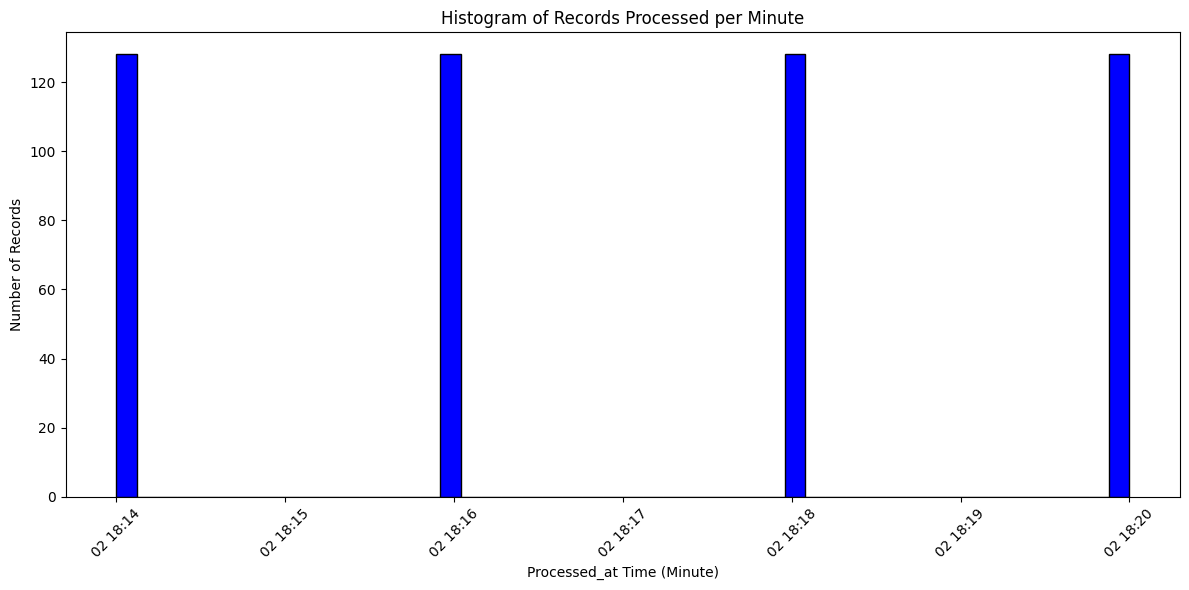

In [36]:
# Round 'processed_at' to the nearest minute
storm_w['processed_at_minute'] = storm_w['processed_at'].dt.floor('T')

# Plot histogram of how many records are processed per minute
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(storm_w['processed_at_minute'], bins=50, color='blue', edgecolor='black')

# Formatting the plot
plt.title('Histogram of Records Processed per Minute')
plt.xlabel('Processed_at Time (Minute)')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/3c/xpn63_zx60zfp8q71qd10x7w0000gn/T/ipykernel_27988/4020640749.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  storm_w['written_at_minute'] = storm_w['written_at'].dt.floor('T')


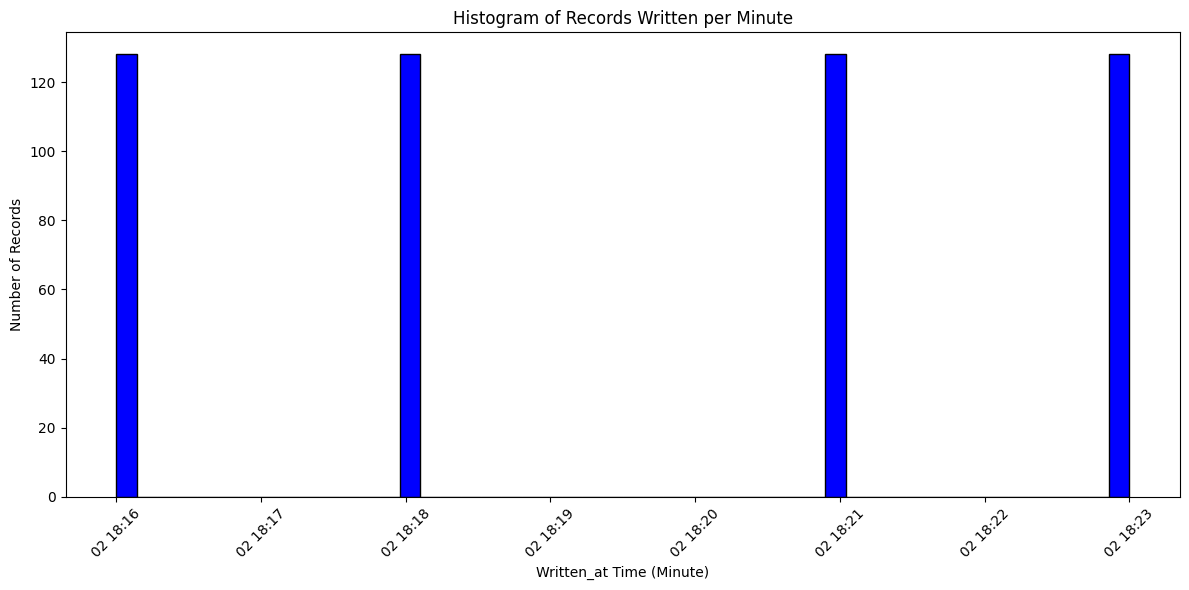

In [37]:
# Round 'processed_at' to the nearest minute
storm_w['written_at_minute'] = storm_w['written_at'].dt.floor('T')

# Plot histogram of how many records are processed per minute
plt.figure(figsize=(12, 6))

# Plot histogram
plt.hist(storm_w['written_at_minute'], bins=50, color='blue', edgecolor='black')

# Formatting the plot
plt.title('Histogram of Records Written per Minute')
plt.xlabel('Written_at Time (Minute)')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()